In [6]:
import skimage.io as io
import matplotlib.pyplot as plt
from PIL import Image
import os
import cv2
import numpy as np 

### Convert DHM images to 8-bit image 0-255

In [7]:
test_path="/Users/behnazyazdani/Unet_Cells/Img-Cells/image"
save_path = "/Users/behnazyazdani/Unet_Cells/Img-Cells/img_8bit"
as_gray = True
file_list = [f for f in os.listdir(test_path) if f[-3:]=="tif"]
#print(file_list) 
for i in range(len(file_list)):
    img = Image.open(os.path.join(test_path,file_list[i]))
    img = np.array(img)
    fimg = cv2.normalize(img, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_8U)
    filename = os.path.join(save_path,os.path.splitext(file_list[i])[0]+".tif")
    io.imsave(filename,fimg)

### Convert mask images to 8-bit 0-1 scale

In [8]:
test_path="/Users/behnazyazdani/Unet_Cells/Img-Cells/Manual"
save_path = "/Users/behnazyazdani/Unet_Cells/Img-Cells/lbl_8bit"
as_gray = True
file_list = [f for f in os.listdir(test_path) if f[-3:]=="png"]
print(file_list) 
for i in range(len(file_list)):
    img = Image.open(os.path.join(test_path,file_list[i]))
    img = np.array(img)
    img_uint8 = img.astype(np.uint8)
    #fimg = cv2.normalize(img, None, alpha = 0, beta = 1000, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_8U)
    mask_img = img_uint8>0.99
    filename = os.path.join(save_path,os.path.splitext(file_list[i])[0]+".tif")
    io.imsave(filename,mask_img)

['2022_10_07_D15_CS1_7_5X_cp_masks.png', '2022_10_07_D15_CS4_7_5X_cp_masks.png', '2022_06_28_D12_CS1_7_5X_cp_masks.png', '2022_10_07_D15_CS5_7_5X_cp_masks.png', '2022_08_09_D12_CS6_7_5X_cp_masks.png', '2022_11_02_D13_GCaMP7c_CS1_7_5X_cp_masks.png', '2022_06_29_D13_CS1_7_5X_cp_masks.png', 'RatNeuron_5_666_Bw_2_5X_cp_masks.png', '2022_09_22_D7_CS3_7_5X_cp_masks.png', 'RatNeuron_1_666_Bw_2_5X_cp_masks.png', '2022_08_09_D12_CS2_7_5X_cp_masks.png', '2022_08_04_D14_CS2_7_5X_cp_masks.png', 'RatNeuron_3_666_Bw_2_5X_cp_masks.png', '2022_08_19_D8_CS5_7_5X_cp_masks.png', '2022_11_02_D13_GCaMP6f_CS2_7_5X_cp_masks.png', '2022_08_15_D18_CS2_7_5X_cp_masks.png', '2022_08_15_D18_CS1_7_5X_cp_masks.png', '2022_08_19_D8_CS3_7_5X_cp_masks.png', 'RatNeuron_2_666_Bw_2_5X_cp_masks.png', '2022_06_23_D14_CS1_7_5X_cp_masks.png', '2022_08_15_D18_CS5_7_5X_cp_masks.png', '2022_08_11_D8_CS3_7_5X_cp_masks.png']


/var/folders/v5/bwhfmjqj76q64_jsz9fyv3z40000gn/T/ipykernel_2331/1819643895.py:14: UserWarning: /Users/behnazyazdani/Unet_Cells/Img-Cells/lbl_8bit/2022_10_07_D15_CS1_7_5X_cp_masks.tif is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(filename,mask_img)
/var/folders/v5/bwhfmjqj76q64_jsz9fyv3z40000gn/T/ipykernel_2331/1819643895.py:14: UserWarning: /Users/behnazyazdani/Unet_Cells/Img-Cells/lbl_8bit/2022_10_07_D15_CS4_7_5X_cp_masks.tif is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(filename,mask_img)
/var/folders/v5/bwhfmjqj76q64_jsz9fyv3z40000gn/T/ipykernel_2331/1819643895.py:14: UserWarning: /Users/behnazyazdani/Unet_Cells/Img-Cells/lbl_8bit/2022_06_28_D12_CS1_7_5X_cp_masks.tif is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave

#### Augment training images by cropping large DHM-Mask images randomly. 
* U-Net compatible size for training is [128,128].
* The total number of images is 22.
* The sample size for each image is 5.

/var/folders/v5/bwhfmjqj76q64_jsz9fyv3z40000gn/T/ipykernel_2331/2833133840.py:32: UserWarning: /Users/behnazyazdani/Unet_Cells/Img-Cells/aug/mask_aug/2022_08_15_D18_CS2_7_5X_1.tif is a low contrast image
  io.imsave(os.path.join(mask_save_path,str(list1[i]).replace('cp_masks.tif','')+str(j)+".tif"),mask)
/var/folders/v5/bwhfmjqj76q64_jsz9fyv3z40000gn/T/ipykernel_2331/2833133840.py:32: UserWarning: /Users/behnazyazdani/Unet_Cells/Img-Cells/aug/mask_aug/2022_08_15_D18_CS5_7_5X_0.tif is a low contrast image
  io.imsave(os.path.join(mask_save_path,str(list1[i]).replace('cp_masks.tif','')+str(j)+".tif"),mask)


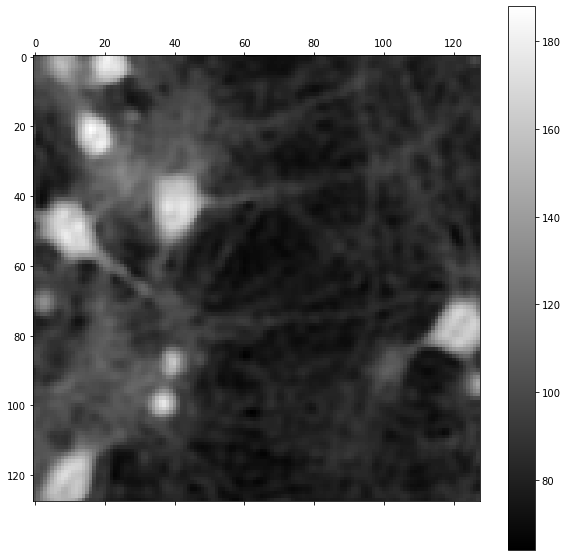

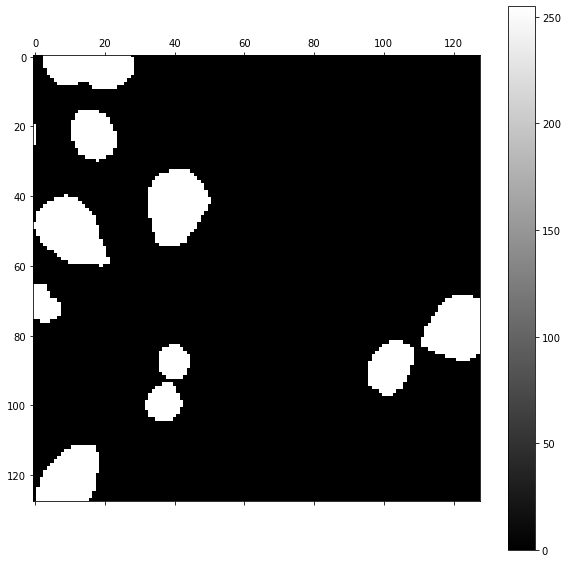

In [102]:
from random import randrange
mask_test_path="/Users/behnazyazdani/Unet_Cells/Img-Cells/lbl_8bit"
mask_save_path = "/Users/behnazyazdani/Unet_Cells/Img-Cells/aug/mask_aug"

img_test_path = "/Users/behnazyazdani/Unet_Cells/Img-Cells/img_8bit"
img_save_path = "/Users/behnazyazdani/Unet_Cells/Img-Cells/aug/img_aug"


mask_file_list = [f for f in os.listdir(mask_test_path) if f[-3:]=="tif"]
img_file_list = [f for f in os.listdir(img_test_path) if f[-3:]=="tif"]
list1 = [ele for ele in sorted(mask_file_list)]
list2 = [ele for ele in sorted(img_file_list)]



matrix = 128
sample = 5


for i in range(len(mask_file_list)):
    mask_img = Image.open(os.path.join(mask_test_path,list1[i]))
    img_img = Image.open(os.path.join(img_test_path,list2[i]))
    mask_img = np.array(mask_img)
    img_img = np.array(img_img)
    x, y = np.shape(img_img)
    for j in range(sample):
        x1 = randrange(0, x - matrix) 
        y1 = randrange(0, y - matrix)
        DHM_img = img_img[x1:x1 + matrix, y1:y1 + matrix]
        mask = mask_img[x1:x1 + matrix, y1:y1 + matrix]
        io.imsave(os.path.join(img_save_path,str(list2[i].replace('.tif',''))+"_"+str(j)+".tif"),DHM_img)
        io.imsave(os.path.join(mask_save_path,str(list1[i]).replace('cp_masks.tif','')+str(j)+".tif"),mask)
        
        
plt.figure(figsize=(10,10))
plt.matshow(DHM_img, cmap='gray', fignum=0)
plt.colorbar()
plt.show()

plt.figure(figsize=(10,10))
plt.matshow(mask, cmap='gray', fignum=0)
plt.colorbar()
plt.show()